<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/Cat-and-Dog-Classification-using-CNN/blob/main/Cat%20and%20Dog%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 49.1MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s] 


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize - to bring pixel values to a range of 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.2890 - accuracy: 0.6076 - val_loss: 0.6215 - val_accuracy: 0.6532
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5506 - accuracy: 0.7244 - val_loss: 0.5284 - val_accuracy: 0.7482
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4708 - accuracy: 0.7750 - val_loss: 0.4913 - val_accuracy: 0.7724
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4203 - accuracy: 0.8084 - val_loss: 0.5089 - val_accuracy: 0.7602
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3584 - accuracy: 0.8396 - val_loss: 0.5588 - val_accuracy: 0.7354
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2980 - accuracy: 0.8726 - val_loss: 0.5414 - val_accuracy: 0.7772
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2223 - accuracy: 0.9090 - val_loss: 0.5859 - val_ac

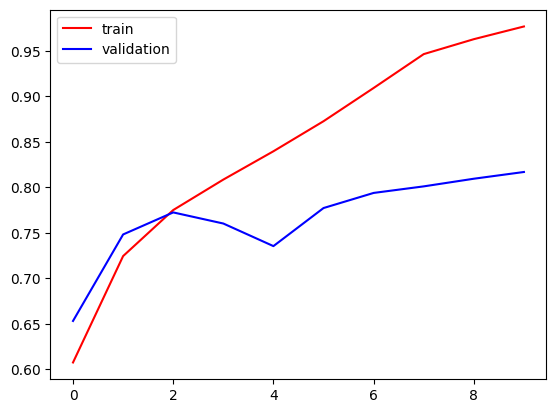

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

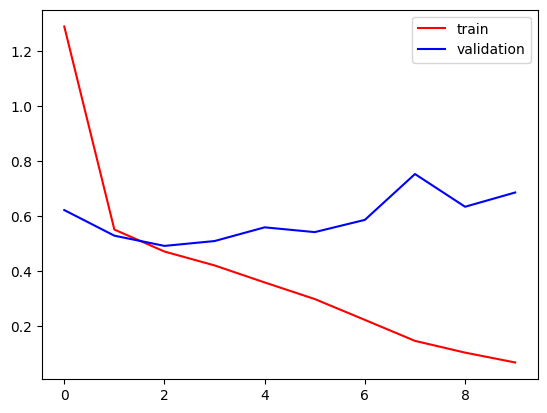

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [30]:
test_img1 = cv2.imread('/content/cat.jpg')

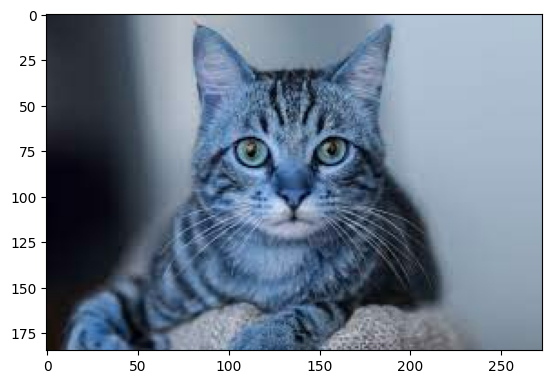

In [31]:
plt.imshow(test_img1)

In [32]:
test_img1.shape

(185, 273, 3)

In [33]:
test_img1 = cv2.resize(test_img1,(256,256))

In [34]:
test_input1 = test_img1.reshape((1,256,256,3))

In [35]:
model.predict(test_input1)

1/1 [==============================] - 0s 29ms/step


array([[0.]], dtype=float32)